In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import yeojohnson
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Use the numerical variables from our dataset this week.

In [3]:
df = pd.read_csv("numerical.csv")
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9126,23405.987980,71941,73,18,89,0,2,198.234764
9127,3096.511217,21604,79,14,28,0,1,379.200000
9128,8163.890428,0,85,9,37,3,2,790.784983
9129,7524.442436,21941,96,34,3,0,3,691.200000


In [29]:
df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

### Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

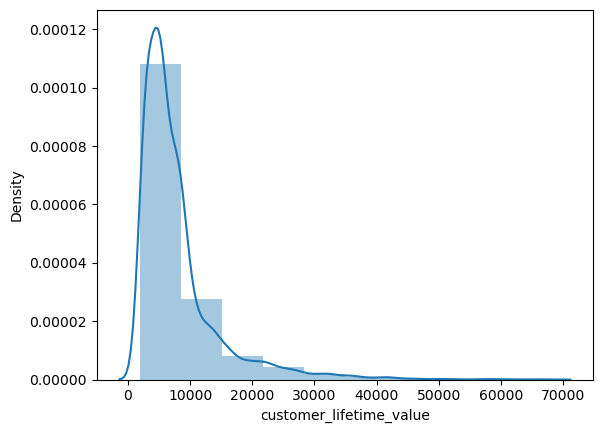

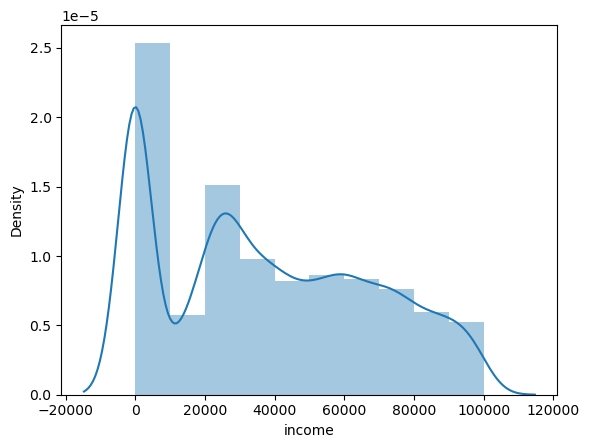

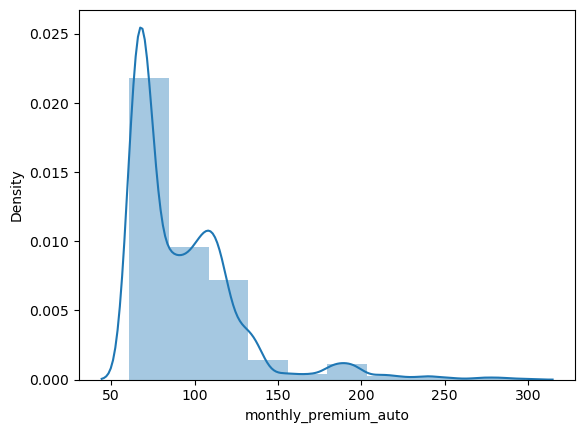

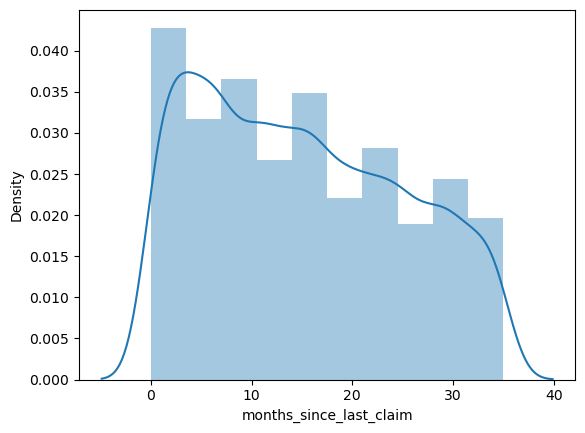

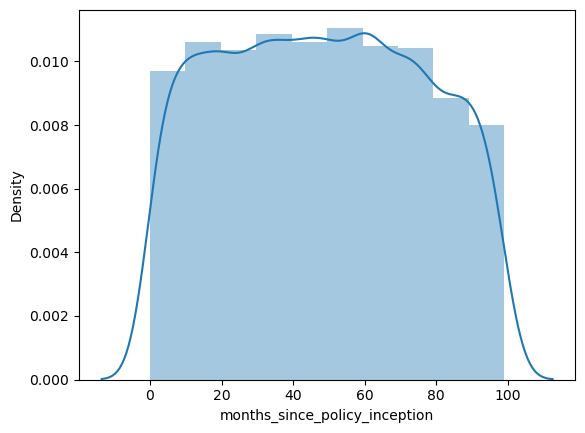

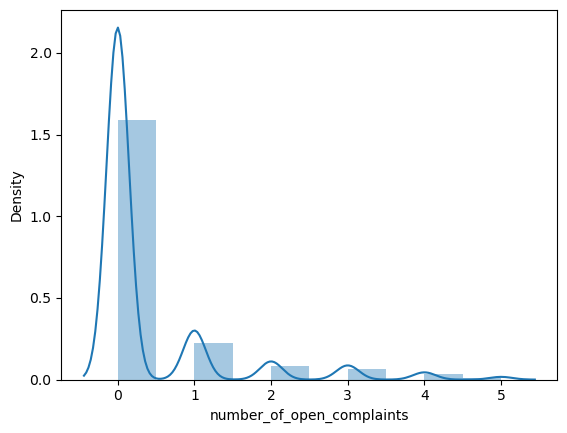

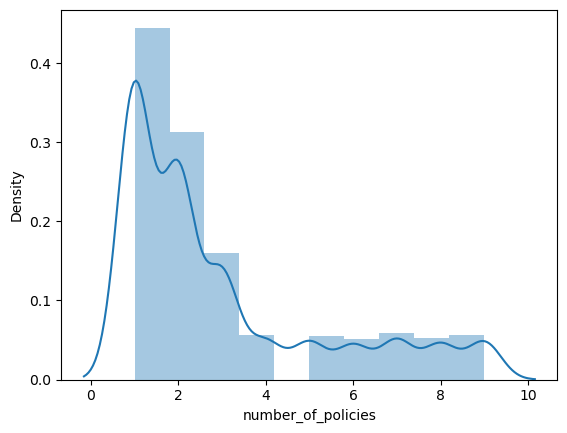

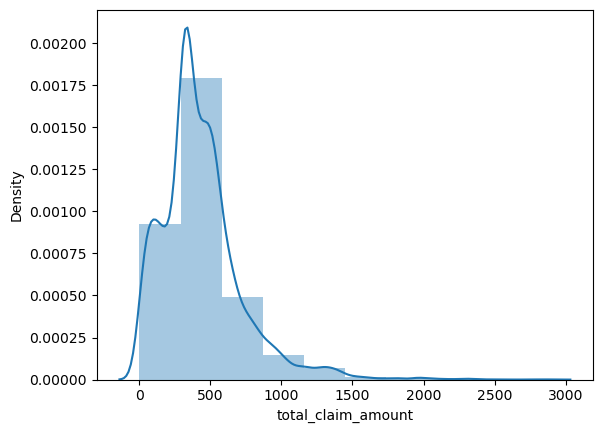

In [15]:
for col in df.columns:
    sns.distplot(df[col], bins=10)
    plt.show()

Months_Since_Policy_Inception has a uniform distribution, while the rest seem to have an exponential distribution.

### Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

#### We would try log-transform for customer lifetime value, as it is heavily skewed right.

In [23]:
def log_transfom(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN

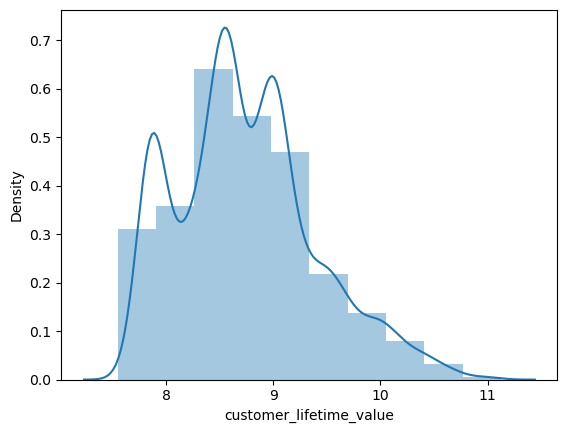

In [26]:
clvlog = df['customer_lifetime_value'].apply(log_transfom)

sns.distplot(clvlog, bins=10)
plt.show()

The log-transform has improved the plot as it is now approaching a normal distribution although not all they way there yet.

#### For the data with only positive values we would use Box-Cox transformation.

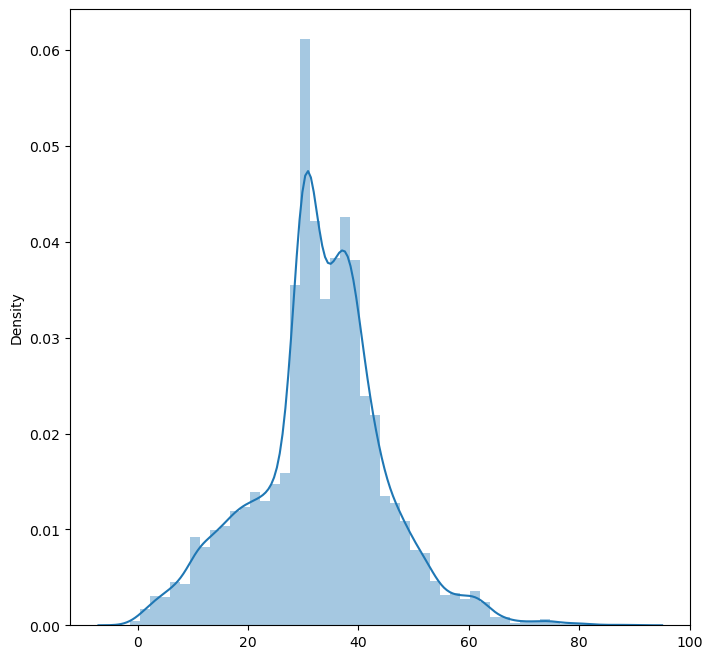

In [59]:
tdata = boxcox(df['total_claim_amount'])[0]
plt.figure(figsize = (8, 8))
sns.distplot(tdata)
plt.show()

We can see a change in the distribution for total_claim_amount. This looks more like a normal distribution, compared to the original shape.

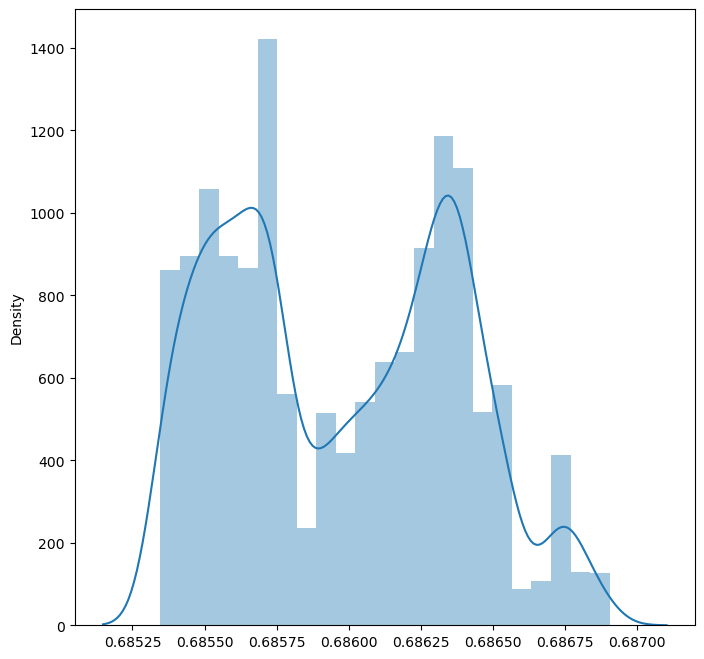

In [39]:
tdata = boxcox(df['monthly_premium_auto'])[0]
plt.figure(figsize = (8, 8))
sns.distplot(tdata)
plt.show()

Here, we get a new shape in monthly_premium_auto but not a normal distribution.

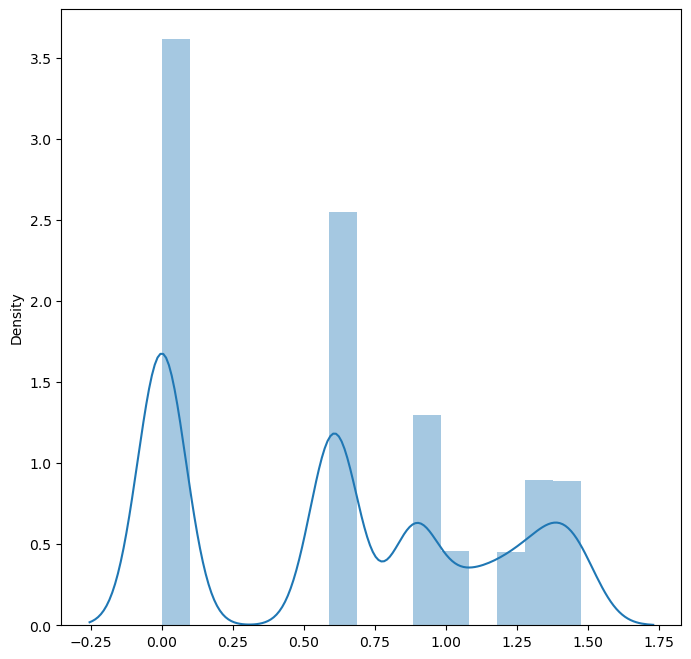

In [42]:
tdata = boxcox(df['number_of_policies'])[0]
plt.figure(figsize = (8, 8))
sns.distplot(tdata)
plt.show()

We also get a new distribution here for number_of_policies but not a normal distribution.